# First inspection of data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic_df = pd.read_csv('titanic_imp.csv')
titanic_df

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN
...,...,...,...,...,...,...,...,...,...
889,1,1,male,26.0,0,0,$30.0,C,C
890,0,3,male,32.0,0,0,$7.75,Q,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [4]:
titanic_df.describe()

,Class,SipSp,ParCh
count,894.000000,894.000000,894.000000
mean,2.309843,0.522371,0.381432
std,0.835370,1.101283,0.805171
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,3.000000,8.000000,6.000000


In [5]:
titanic_df.describe(include = 'O')

,Survived,Gender,Age,Fare,Emb,Deck
count,894,894,758,894,892,203
unique,4,2,92,248,3,7
top,0,male,Missing Data,$8.05,S,C
freq,551,580,41,43,647,59


## Fix Survived Column

In [6]:
titanic_df.Survived.unique()

array(['0', '1', 'yes', 'no'], dtype=object)

In [7]:
titanic_df.Survived.value_counts()

Survived
0      551
1      341
yes      1
no       1
Name: count, dtype: int64

In [8]:
titanic_df.Survived.replace(to_replace = ["yes", "no"], value = [1,0], inplace = True)

In [9]:
titanic_df.Survived.unique()

array(['0', '1', 1, 0], dtype=object)

In [10]:
titanic_df.Survived.value_counts()

Survived
0    551
1    341
1      1
0      1
Name: count, dtype: int64

In [11]:
titanic_df.Survived = titanic_df.Survived.astype("int")

In [12]:
titanic_df.Survived.value_counts()

Survived
0    552
1    342
Name: count, dtype: int64

In [13]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    int64 
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(4), object(5)
memory usage: 63.0+ KB


## Fare Column

In [14]:
titanic_df.Fare.unique()

array(['$7.25', '$71.2833', '$7.925', '$53.1', '$8.05', '$8.4583',
       '$51.8625', '$21.075', '$11.1333', '$30.0708', '$16.7', '$26.55',
       '$31.275', '$7.8542', '$16.0', '$29.125', '$13.0', '$18.0',
       '$7.225', '$26.0', '$8.0292', '$35.5', '$31.3875', '$263.0',
       '$7.8792', '$7.8958', '$27.7208', '$146.5208', '$7.75', '$10.5',
       '$82.1708', '$52.0', '$7.2292', '$11.2417', '$9.475', '$21.0',
       '$41.5792', '$15.5', '$21.6792', '$17.8', '$39.6875', '$7.8',
       '$76.7292', '$61.9792', '$27.75', '$46.9', '$80.0', '$83.475',
       '$27.9', '$15.2458', '$8.1583', '$8.6625', '$73.5', '$14.4542',
       '$56.4958', '$7.65', '$29.0', '$12.475', '$9.0', '$9.5', '$7.7875',
       '$47.1', '$15.85', '$34.375', '$61.175', '$20.575', '$34.6542',
       '$63.3583', '$23.0', '$77.2875', '$8.6542', '$7.775', '$24.15',
       '$9.825', '$14.4583', '$247.5208', '$7.1417', '$22.3583', '$6.975',
       '$7.05', '$14.5', '$15.0458', '$26.2833', '$9.2167', '$79.2',
       '$6.7

In [15]:
titanic_df.Fare = titanic_df.Fare.str.replace("$", "")
titanic_df.Fare = titanic_df.Fare.astype("float")

In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int64  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       758 non-null    object 
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 63.0+ KB


## Age column

In [17]:
titanic_df.Age.value_counts()

Age
Missing Data    41
24.0            31
22.0            27
18.0            26
30.0            25
                ..
490              1
250              1
0.42             1
34.5             1
74.0             1
Name: count, Length: 92, dtype: int64

In [18]:
titanic_df.Age.replace(to_replace = "Missing Data", value = np.nan, inplace = True)

In [19]:
titanic_df.Age.value_counts(dropna = False)

Age
NaN     177
24.0     31
22.0     27
18.0     26
30.0     25
       ... 
490       1
250       1
0.42      1
34.5      1
74.0      1
Name: count, Length: 92, dtype: int64

In [20]:
titanic_df.Age = titanic_df.Age.astype("float")

In [21]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int64  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 63.0+ KB


## Remove - Replace missing fields

In [22]:
titanic_df.shape

(894, 9)

In [23]:
titanic_df.dropna().shape

(182, 9)

In [24]:
titanic_df.dropna(thresh = 8).shape

(736, 9)

In [25]:
titanic_df.dropna(axis = 1, thresh = 500).shape

(894, 8)

In [26]:
titanic_df.dropna(axis = 1, thresh = 500, inplace = True)

In [27]:
titanic_df

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
889,1,1,male,26.0,0,0,30.0000,C
890,0,3,male,32.0,0,0,7.7500,Q
891,0,2,male,24.0,0,0,10.5000,S
892,0,3,male,34.0,1,1,14.4000,S


In [34]:
mean_val = round(titanic_df.Age.mean(), 1)
mean_val

30.7

In [36]:
titanic_df.Age.fillna(mean_val, inplace = True)

In [38]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int64  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       894 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 56.0+ KB


## Check duplicates

In [39]:
titanic_df.duplicated(keep = "first").sum()

114

In [40]:
titanic_df.drop(index = [891, 892, 893], inplace = True)

## Check outliers

In [41]:
titanic_df.describe()

,Survived,Class,Age,SipSp,ParCh,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,30.712761,0.523008,0.381594,32.204208
std,0.486592,0.836071,21.588838,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.700000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,490.000000,8.000000,6.000000,512.329200


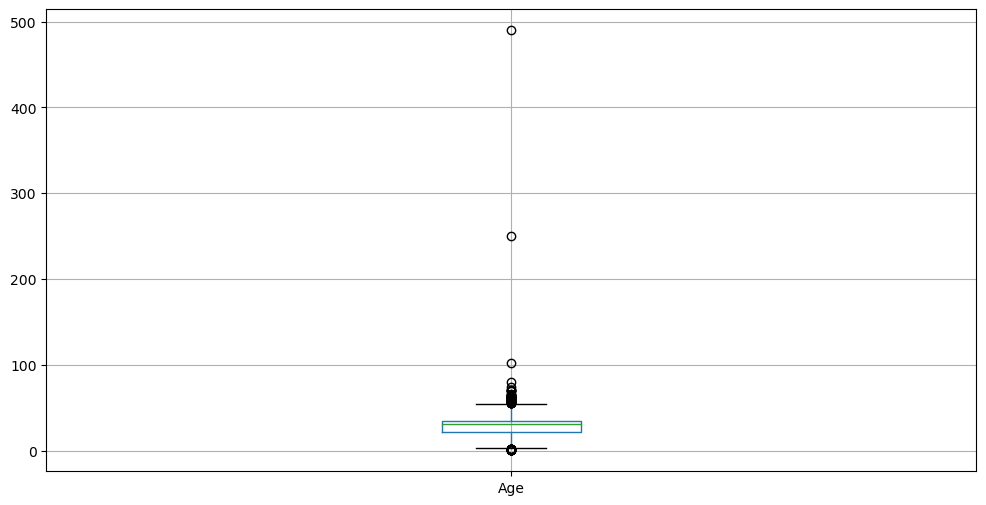

In [42]:
plt.figure(figsize = (12,6))
titanic_df.boxplot('Age')
plt.show()

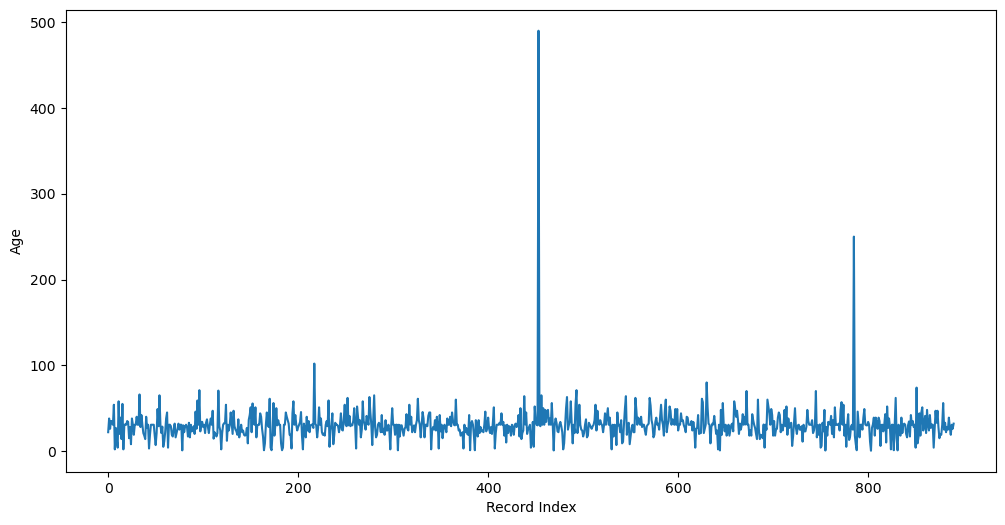

In [43]:
plt.figure(figsize = (12,6))
titanic_df.Age.plot(xlabel = "Record Index", ylabel = "Age")
plt.show()

In [44]:
titanic_df.Age.sort_values(ascending = False)

453    490.00
785    250.00
217    102.00
630     80.00
851     74.00
        ...  
831      0.83
644      0.75
469      0.75
755      0.67
803      0.42
Name: Age, Length: 891, dtype: float64

In [46]:
titanic_df.loc[titanic_df.Age>90]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb
217,0,2,male,102.0,1,0,27.0000,S
453,1,1,male,490.0,1,0,89.1042,C
785,0,3,male,250.0,0,0,7.2500,S


In [47]:
titanic_df.loc[titanic_df.Age>90, "Age"] /= 10

In [49]:
titanic_df.loc[titanic_df.Age>90]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb


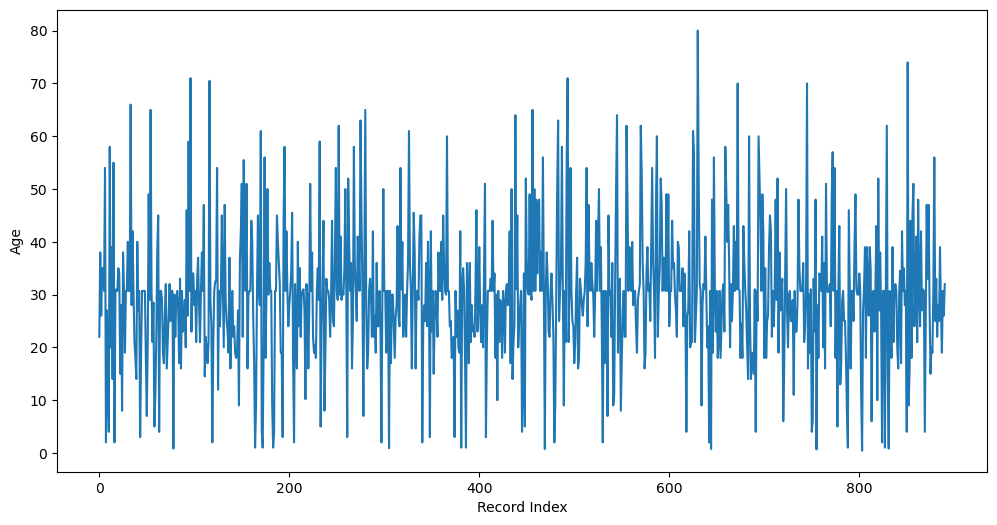

In [51]:
plt.figure(figsize=(12,6))
titanic_df.Age.plot(xlabel="Record Index",ylabel = "Age")
plt.show()

## Final adjustments

In [52]:
titanic_df.Gender = titanic_df.Gender.astype("category")

In [53]:
titanic_df.Emb = titanic_df.Emb.astype("category")

In [54]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Class     891 non-null    int64   
 2   Gender    891 non-null    category
 3   Age       891 non-null    float64 
 4   SipSp     891 non-null    int64   
 5   ParCh     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Emb       889 non-null    category
dtypes: category(2), float64(2), int64(4)
memory usage: 43.9 KB


In [ ]:
#titanic.to_csv("titanic_clean.csv", index = False)